In [1]:
# one_d_maze_abstract_time_to_criterion_control_final
import keras
import hrr as hrr
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
bias = 1.0
reward = 1.0
gamma = 0.9
alpha = 0.01
lambd = 0.0
states = 20
non_reward = 0
hrr_size = 2048
non_goal_states = 0
gates = ['open', 'close']
actions = ['left', 'right']
colors = ['red', 'green', 'purple', 'blue']

runs = 10
ep_down_1 = 3.0
ep_down_2 = 2.0
ep_down_3 = 1.0
fold_counter_ar = []
len_memory_store = []
sub_optimal_goal = 0.5
last_100_sub_optimal_runs = []

In [3]:
def problem(prob):
    rand = np.random.random()
    if sum(prob) > 1:
        print('ERROR CHECK PROBLEM FUNCTION')
    mem = prob[0]
    color = ''
    for i in range(len(prob)):
    #     print(i, "mem =", mem)
        if rand < mem:
            color = colors[i]
            break
        else:
            mem += prob[i+1]
    return color

In [4]:
# working memory
# this will choose the open/close action

def encode_gate(state, signal, w_m, gate_action):
    string = 'state_'  + str(state) + "*" + \
             'signal_' + str(signal) + "*" + \
             'w_m_' + str(w_m) + "*" + \
             'gate_action' + str(gate_action)
    encoded = np.array([memory.encode(string)])
    return(encoded)

def q_gate(state, signal, w_m):
    max_value = 0
    
    if signal != '':
        signal = 'on'        
    if w_m != '':
        w_m = 'on'
        
    for gate_action in gates:
        hrr = encode_gate(state, signal, w_m, gate_action)
        value = model_gate.predict(hrr)[0,0] + bias
        if value > max_value:
            max_value = value
            max_hrr = hrr
            max_gate = gate_action
    return  max_value, max_hrr, max_gate

In [5]:
# working memory
# move l/r

def encode_move(state, signal, w_m, phyical_action):
    string = 'state_'  + str(state) + "*" + \
             'signal_' + str(signal) + "*" + \
             'w_m_' + str(w_m) + "*" + \
             'phyical_action' + str(phyical_action)
    encoded = np.array([memory.encode(string)])
    return(encoded)

def q_move(state, signal, w_m):
    max_value = 0
    for phyical_action in actions:
        hrr = encode_move(state, signal, w_m, phyical_action)
        value = model_move.predict(hrr)[0,0] + bias
        if value > max_value:
            max_value = value
            max_hrr = hrr
            max_action = phyical_action
    return  max_value, max_hrr, max_action

In [6]:
# random mover

def random_q_gate(state, signal, w_m):
    if signal != '':
        signal = 'on'        
    if w_m != '':
        w_m = 'on'

    gate = np.random.choice(gates)
    hrr = encode_gate(state, signal, w_m, gate)
    value = model_gate.predict(hrr)[0,0] + bias
    return value, hrr, gate

def random_q_move(state, signal, w_m):
    phyical_move = np.random.choice(actions)
    hrr = encode_move(state, signal, w_m, phyical_move)
    value = model_move.predict(hrr)[0,0] + bias
    return value, hrr, phyical_move

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2048      
Total params: 2,048
Trainable params: 2,048
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2048      
Total params: 2,048
Trainable params: 2,048
Non-trainable params: 0
_________________________________________________________________
on  1000
reached  8.98
on  2000
reached  6.21
on  3000
reached  4.18
one epsilon changed to: 0.025
reached  2.91
on  4000
reached  3.46
two epsilon changed to: 0.0125
reached  1.91
on  5000
reached  1.45
tre epsilon changed to: 0.00625
reached  0.96
on  6000
reached  0.89
reached  0.48 switc

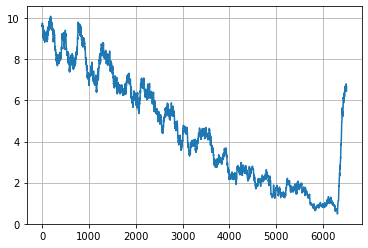

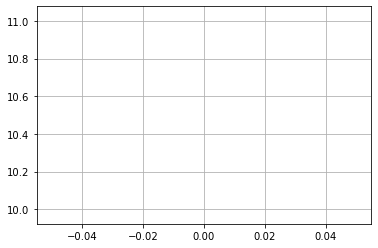

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 2048      
Total params: 2,048
Trainable params: 2,048
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2048      
Total params: 2,048
Trainable params: 2,048
Non-trainable params: 0
_________________________________________________________________
on  1000
reached  6.71
on  2000
reached  6.01
on  3000
reached  4.51
on  4000
reached  3.23
one epsilon changed to: 0.025
reached  2.9
two epsilon changed to: 0.0125
reached  1.99
on  5000
reached  2.23
on  6000
reached  1.78
tre epsilon changed to: 0.00625
reached  0.87
on  7000
reached  1.

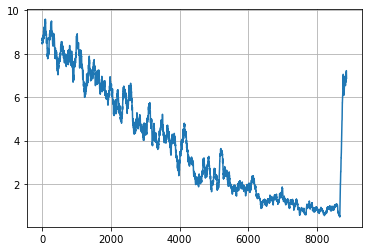

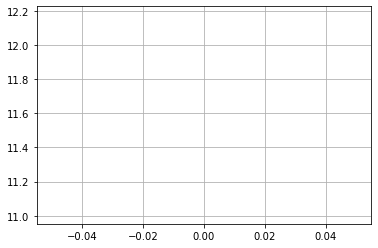

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 2048      
Total params: 2,048
Trainable params: 2,048
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 2048      
Total params: 2,048
Trainable params: 2,048
Non-trainable params: 0
_________________________________________________________________
on  1000
reached  7.28
on  2000
reached  6.48
on  3000
reached  5.23
one epsilon changed to: 0.025
reached  2.97
two epsilon changed to: 0.0125
reached  1.99
on  4000
reached  3.06
on  5000
reached  1.95
tre epsilon changed to: 0.00625
reached  0.9
on  6000
reached  1.12
reached  0.4 switch 

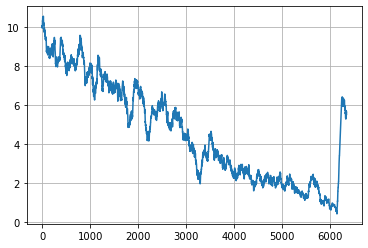

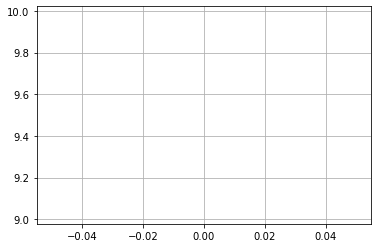

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 2048      
Total params: 2,048
Trainable params: 2,048
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 2048      
Total params: 2,048
Trainable params: 2,048
Non-trainable params: 0
_________________________________________________________________
on  1000
reached  8.14
on  2000
reached  5.3
on  3000
reached  3.7
one epsilon changed to: 0.025
reached  2.98
on  4000
reached  2.7
two epsilon changed to: 0.0125
reached  1.97
on  5000
reached  1.5
tre epsilon changed to: 0.00625
reached  0.95
reached  0.48 switch to crying
location 5297
e

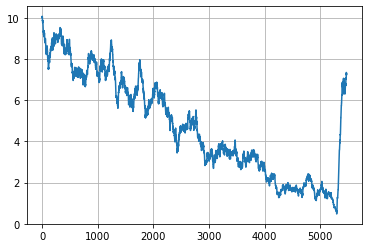

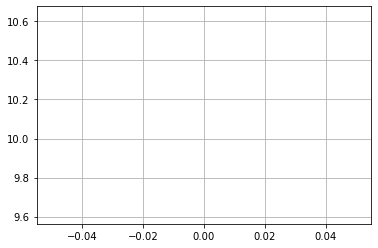

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1)                 2048      
Total params: 2,048
Trainable params: 2,048
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1)                 2048      
Total params: 2,048
Trainable params: 2,048
Non-trainable params: 0
_________________________________________________________________
on  1000
reached  8.23
on  2000
reached  5.07
on  3000
reached  4.5
on  4000
reached  4.53
one epsilon changed to: 0.025
reached  2.92
two epsilon changed to: 0.0125
reached  1.92
on  5000
reached  1.76
tre epsilon changed to: 0.00625
reached  0.92
on  6000
reached  1.43
reached  0.47 switc

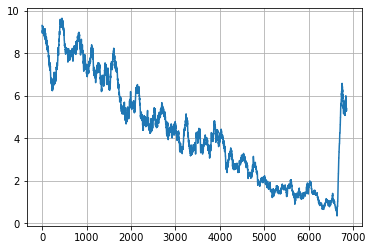

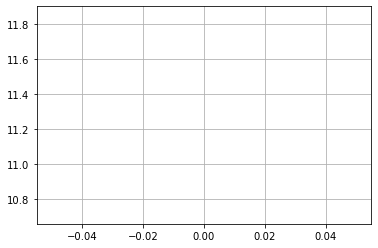

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1)                 2048      
Total params: 2,048
Trainable params: 2,048
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1)                 2048      
Total params: 2,048
Trainable params: 2,048
Non-trainable params: 0
_________________________________________________________________
on  1000
reached  7.69
on  2000
reached  5.86
on  3000
reached  5.09
one epsilon changed to: 0.025
reached  2.93
on  4000
reached  3.44
two epsilon changed to: 0.0125
reached  1.92
on  5000
reached  2.32
tre epsilon changed to: 0.00625
reached  0.94
on  6000
reached  0.92
reached  0.46 swi

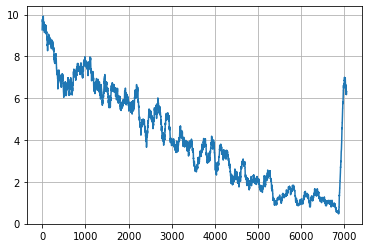

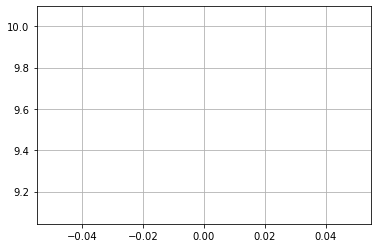

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1)                 2048      
Total params: 2,048
Trainable params: 2,048
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 1)                 2048      
Total params: 2,048
Trainable params: 2,048
Non-trainable params: 0
_________________________________________________________________
on  1000
reached  8.51
on  2000
reached  8.04
on  3000
reached  6.14
on  4000
reached  3.82
one epsilon changed to: 0.025
reached  2.98
on  5000
reached  2.36
two epsilon changed to: 0.0125
reached  1.98
tre epsilon changed to: 0.00625
reached  0.97
on  6000
reached  1.52
reached  0.49 swi

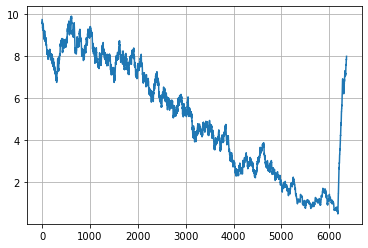

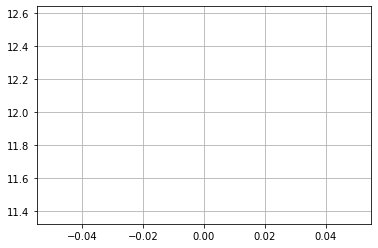

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 1)                 2048      
Total params: 2,048
Trainable params: 2,048
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 1)                 2048      
Total params: 2,048
Trainable params: 2,048
Non-trainable params: 0
_________________________________________________________________
on  1000
reached  8.54
on  2000
reached  6.53
on  3000
reached  5.38
on  4000
reached  3.71
one epsilon changed to: 0.025
reached  2.98
on  5000
reached  3.62
two epsilon changed to: 0.0125
reached  1.99
on  6000
reached  1.63
tre epsilon changed to: 0.00625
reached  0.95
on  7000
reached 

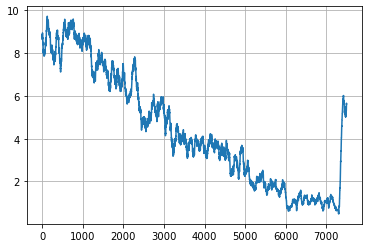

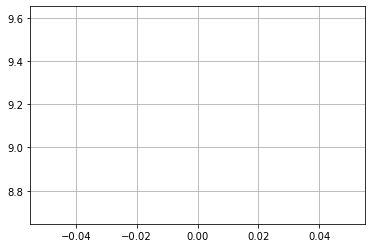

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 1)                 2048      
Total params: 2,048
Trainable params: 2,048
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 1)                 2048      
Total params: 2,048
Trainable params: 2,048
Non-trainable params: 0
_________________________________________________________________
on  1000
reached  8.42
on  2000
reached  5.22
on  3000
reached  4.47
one epsilon changed to: 0.025
reached  2.96
on  4000
reached  3.04
two epsilon changed to: 0.0125
reached  1.98
tre epsilon changed to: 0.00625
reached  0.98
on  5000
reached  1.35
on  6000
reached  1.08
reached  0.49 swi

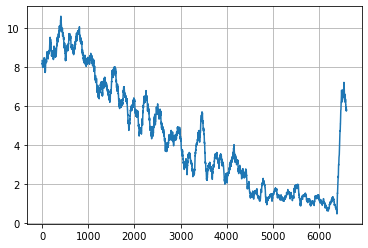

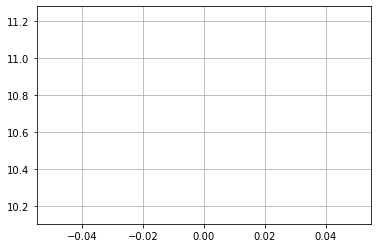

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 1)                 2048      
Total params: 2,048
Trainable params: 2,048
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 1)                 2048      
Total params: 2,048
Trainable params: 2,048
Non-trainable params: 0
_________________________________________________________________
on  1000
reached  8.02
on  2000
reached  6.73
on  3000
reached  3.85
one epsilon changed to: 0.025
reached  2.92
on  4000
reached  5.4
on  5000
reached  3.13
two epsilon changed to: 0.0125
reached  1.91
on  6000
reached  1.25
tre epsilon changed to: 0.00625
reached  0.99
on  7000
reached  

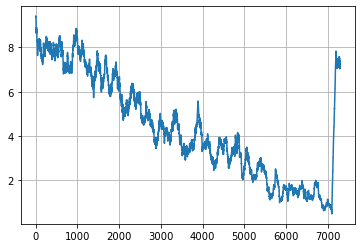

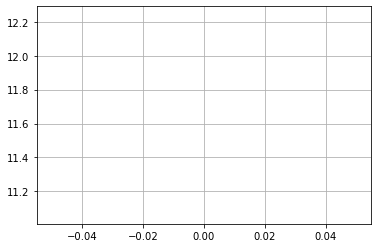

In [7]:
for run in range(runs):

    episode = 0
    epsilon = 0.05
    fold_counter = 0
    # if time_to_cry = True   code will skip pre-training
    # if time_to_cry = False  code will      pre-train
#     time_to_cry = True
    time_to_cry = False
    
    ep_one = True
    ep_two = True
    ep_tre = True
    ep_back_on = False
    run_episode = True    
    sub_optimal_steps = []
    sub_optimal_average = []
    fold_sub_optimal_steps = []
    fold_sub_optimal_average = []
    
    memory = hrr.LTM(hrr_size, True)

    model_gate = keras.models.Sequential()
    model_gate.add(keras.layers.Dense(1,input_shape=[hrr_size],use_bias=False))
    model_gate.compile(loss=keras.losses.mse,
                       optimizer=keras.optimizers.SGD(learning_rate=alpha),
                       metrics=['accuracy'])
    model_gate.summary()

    model_move = keras.models.Sequential()
    model_move.add(keras.layers.Dense(1,input_shape=[hrr_size],use_bias=False))
    model_move.compile(loss=keras.losses.mse,
                       optimizer=keras.optimizers.SGD(learning_rate=alpha),
                       metrics=['accuracy'])
    model_move.summary()

    colorar = []

    while run_episode == True:
        
        fold = False

        if (episode+1) % 1000 == 0:
            print("on ", episode+1)
            print('reached ', sub_optimal_average[-1])

        if len(sub_optimal_average) > 0:
            if ep_tre == True:
                if ep_one == True:
                    if sub_optimal_average[-1] < ep_down_1: 
                        epsilon = epsilon/2
                        ep_one = False
                        print('one epsilon changed to:', epsilon)
                        print('reached ', sub_optimal_average[-1])

                elif ep_two == True:
                    if sub_optimal_average[-1] < ep_down_2: 
                        epsilon = epsilon/2
                        ep_two = False
                        print('two epsilon changed to:', epsilon)
                        print('reached ', sub_optimal_average[-1])
                else:
                    if sub_optimal_average[-1] < ep_down_3:
                        epsilon = epsilon/2
                        ep_tre = False
                        print('tre epsilon changed to:', epsilon)
                        print('reached ', sub_optimal_average[-1])

        current_state = np.random.choice(states)
        
        if time_to_cry == False:
            if len(sub_optimal_average) > 0:
                if sub_optimal_average[-1] < sub_optimal_goal:
                    time_to_cry = True
                    print('reached ', sub_optimal_average[-1], 'switch to crying')
                    print('location', len(sub_optimal_average))
                    ep_back_on = True
                    
        if ep_back_on == True:
            if sub_optimal_average[-1] > 4.0:
                epsilon = 0.05
                print('epsilon back on to ', epsilon)
                ep_one = True
                ep_two = True
                ep_tre = True
                ep_back_on = False
            
        if time_to_cry == False:
            prob = [1/2, 1/2, 0, 0]
        else:
            prob = [1/4, 1/4, 1/4, 1/4]
            
        current_signal = problem(prob)
        colorar.append(current_signal)
        
        if current_signal == 'purple':
            fold = True
        if current_signal == 'blue':
            fold = True

        if current_signal == 'red':
            goal_state = 2
        elif current_signal == 'green':
            goal_state = 7
        elif current_signal == 'purple':
            goal_state = 12
        else:
            goal_state = 17

        if goal_state < current_state:
            optimal_steps_1 = abs(goal_state - current_state)
            optimal_steps_2 = states - current_state + goal_state
        else:
            optimal_steps_1 = abs(goal_state - current_state)
            optimal_steps_2 = states - goal_state + current_state

        if optimal_steps_1 < optimal_steps_2:
            optimal_steps = optimal_steps_1
        else:
            optimal_steps = optimal_steps_2

        current_w_m = ''

        for step in range(states):

            if current_state == goal_state:
                break

            if np.random.random() < epsilon:
                gate_value, \
                gate_hrr, \
                gate_action = random_q_gate(current_state, current_signal, current_w_m)
                current_value, \
                current_hrr, \
                current_action = random_q_move(current_state, current_signal, current_w_m)         
            else:
                gate_value, \
                gate_hrr, \
                gate_action = q_gate(current_state, current_signal, current_w_m)
                current_value, \
                current_hrr, \
                current_action = q_move(current_state, current_signal, current_w_m)

            previous_state = current_state

            previous_gate_value = gate_value
            previous_gate_hrr = gate_hrr
            previous_gate_action = gate_action

            previous_value = current_value
            previous_hrr = current_hrr
            previous_action = current_action

            if gate_action == 'open':
                current_w_m = current_signal

            current_signal = ''

            if (current_action == "left"):
                current_state = (current_state-1)%states
            else:
                current_state = (current_state+1)%states

            if current_state == goal_state:
                target = reward
            else:
                current_value, _, _ = q_move(current_state, current_signal, current_w_m)
                target = non_goal_states + gamma * current_value

            model_gate.fit(previous_gate_hrr, [target-bias], verbose=0)
            model_move.fit(previous_hrr, [target-bias], verbose=0)

        sub_optimal_steps.append(abs(step-optimal_steps))
        
        if fold == True:
            if (episode+1) % 1000 == 0:
                if len(fold_sub_optimal_average) > 0:
                    print('fold reached ', fold_sub_optimal_average[-1])
            fold_counter += 1
            fold_sub_optimal_steps.append(abs(step-optimal_steps))
            
#             if len(fold_sub_optimal_steps) < 100:
#                 fold_sub_optimal_average.append(sum(fold_sub_optimal_steps)/len(fold_sub_optimal_steps))
#             else:
#                 fold_sub_optimal_average.append(sum(fold_sub_optimal_steps[-100:])/100)

            if len(fold_sub_optimal_steps) > 99:
                fold_sub_optimal_average.append(sum(fold_sub_optimal_steps[-100:])/100)
                print('number of purple and blue episodes: ', fold_counter)
                break
#                 if fold_sub_optimal_average[-1] < sub_optimal_goal:
#                     fold_counter_ar.append(fold_counter)
#                     print('number of purple and blue episodes: ', fold_counter)
#                     break
                
#         if len(sub_optimal_steps) < 100:
#             sub_optimal_average.append(sum(sub_optimal_steps)/len(sub_optimal_steps))
#         else:
#             sub_optimal_average.append(sum(sub_optimal_steps[-100:])/100)

        if len(sub_optimal_steps) > 99:
            sub_optimal_average.append(sum(sub_optimal_steps[-100:])/100)

        episode += 1

    list_freq = (Counter(colorar))
    
    for key, value in list_freq.items():
        print(key, " has count ", value)
    
    len_memory_store.append(len(memory.store))
    print('size of dictionary ', len(memory.store))
    
    last_100_sub_optimal_runs.append(fold_sub_optimal_average[0])
    print('100 runs average: ', fold_sub_optimal_average)
    
    plt.plot(sub_optimal_average)
    plt.grid(True)
    plt.show()
    
    plt.plot(fold_sub_optimal_average)
    plt.grid(True)
    plt.show()

In [8]:
len_memory_store

[1600, 1594, 1596, 1600, 1608, 1578, 1602, 1602, 1584, 1608]

In [9]:
last_100_sub_optimal_runs

[10.5, 11.59, 9.5, 10.12, 11.28, 9.57, 11.98, 9.15, 10.69, 11.65]

In [10]:
stan_error = np.std(last_100_sub_optimal_runs)/np.sqrt(len(last_100_sub_optimal_runs))

In [11]:
mean = np.mean(last_100_sub_optimal_runs)
mean

10.603

In [12]:
upper_limit = mean + (1.96 * stan_error)
upper_limit

11.193321610107574

In [13]:
lower_limit = mean - (1.96 * stan_error)
lower_limit

10.012678389892425

In [14]:
(1.96 * stan_error)

0.5903216101075751